# Salary Model Version 1
## Author: Xiaochi (George) Li

Input: "processed_data.pickle" from the preprocessing part  
Spec: No missing value, target variable "salary" should be the last column

Reference: Python Machine Learning (PyML) 2nd Sebastian Raschka

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_pickle("processed_data.pickle")
print("shape:",df.shape)

num_cols = ['Total Payments', 'Lump Sum Pay', 'Other Pay (Payroll Explorer)',
       'FMS Department', 'Job Class', 'Average Benefit Cost', 'p_dep',
        'Rate', 'p_bonus', 't_bonus', 'o_pay', 'long', 'e_pay',
        'insurance', 'financial']
cat_cols = ['e_type', 'benefit', 'Time', 'p_grade']


shape: (80000, 20)


4

In [42]:
df_sample = df.sample(n=int(df.shape[0]*0.1))
cols=num_cols + ['Salary']
df_sample = df_sample[cols]
df_sample.shape

(8000, 16)

In [ ]:
#ToDO : draw box plot for categorical variables

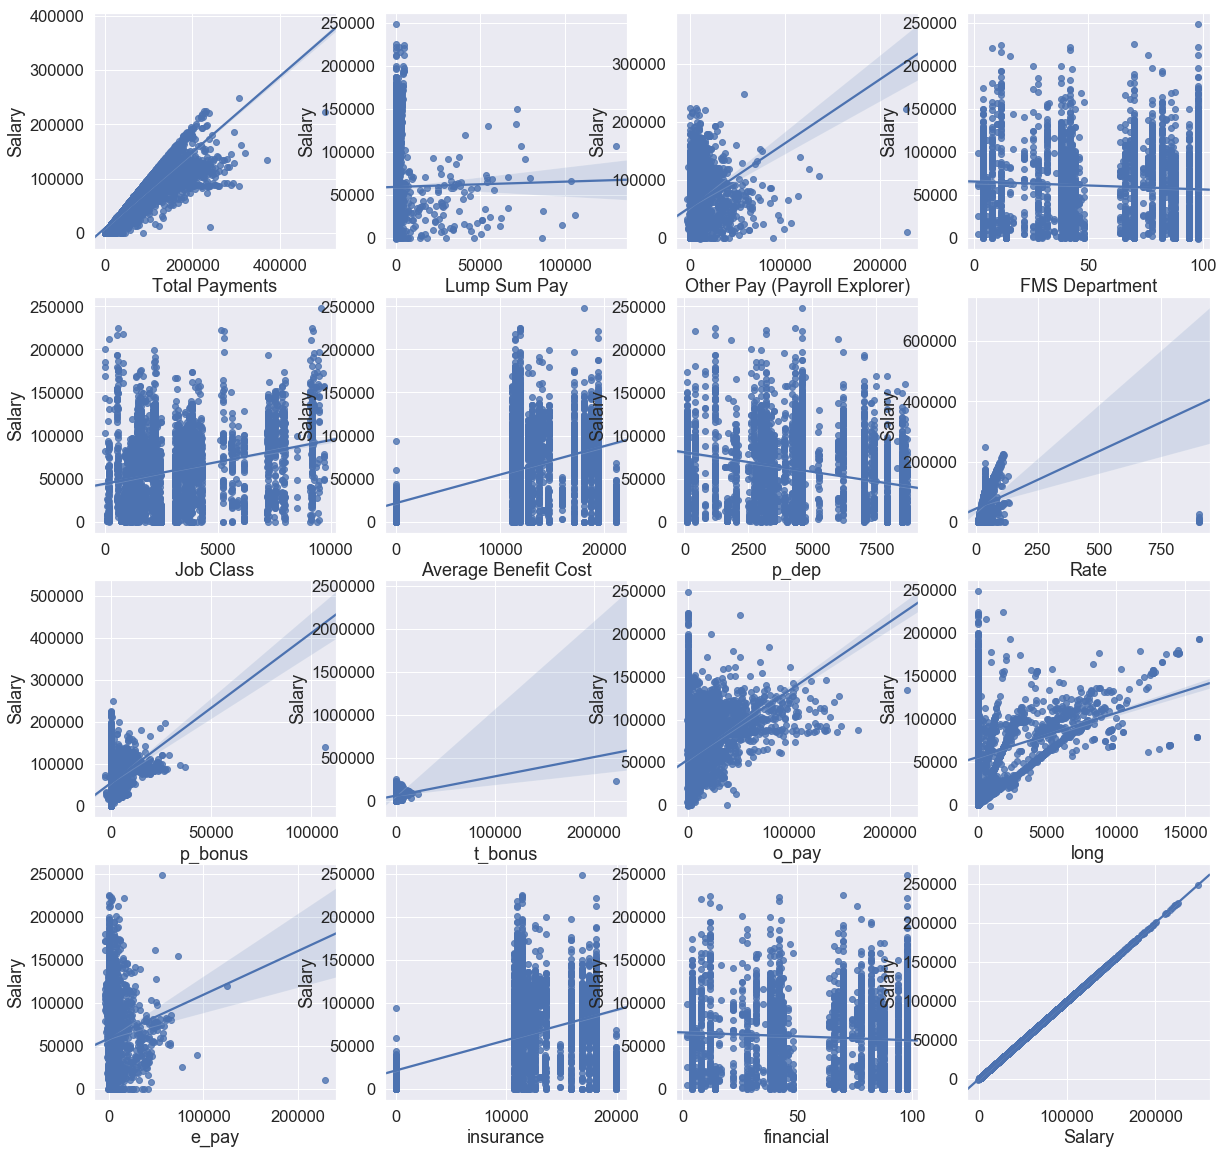

In [43]:
# Draw scatterplot 
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.regplot(x=df_sample[cols[i-1]], y=df_sample["Salary"])


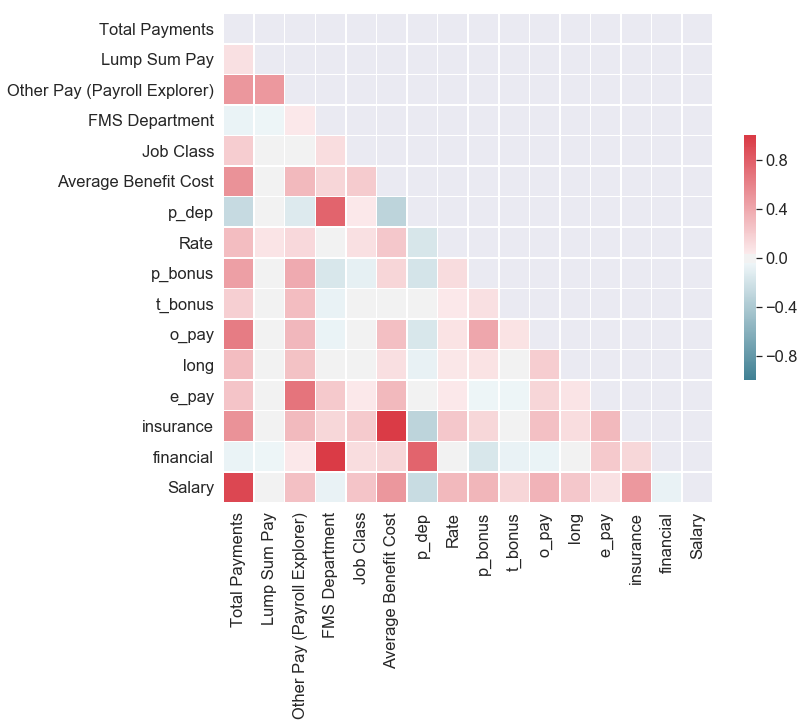

In [44]:
# Draw Correlation Plot
corr = df_sample.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [61]:
# onehot encoding
categotical_features = ["e_type", "benefit", "Time", "p_grade"]
dummy_df = pd.get_dummies(df, columns=categotical_features)
column_name = [i for i in dummy_df.columns if i != "Salary"]+["Salary"]
dummy_df = dummy_df[column_name]
dummy_df.head()

,Total Payments,Lump Sum Pay,Other Pay (Payroll Explorer),FMS Department,Job Class,Average Benefit Cost,p_dep,Rate,p_bonus,t_bonus,...,p_grade_L,p_grade_M,p_grade_N,p_grade_S,p_grade_T,p_grade_V,p_grade_X,p_grade_Y,p_grade_Z,Salary
161542,4847.83,0.0,1740.73,98,941,18755.63,4594.945881,31.29,0.00,0.0,...,0,0,0,0,0,0,0,0,0,3107.10
167941,56481.08,0.0,3480.12,14,1358,11435.16,1603.000000,26.47,2869.48,0.0,...,0,0,0,0,0,0,0,0,0,51560.00
244088,138165.59,0.0,4609.98,98,3115,19392.62,4594.945881,38.26,0.00,0.0,...,0,0,0,0,0,0,0,0,0,78058.00
15392,111777.71,0.0,14526.10,70,2214,12740.52,4301.000000,52.66,13293.10,1233.0,...,0,0,0,0,0,0,0,0,0,94630.06
69682,9961.87,0.0,565.20,88,2498,0.00,7903.000000,14.79,0.00,304.0,...,0,0,0,0,0,0,0,0,0,9396.67


In [59]:
# Train test split
from sklearn.model_selection import train_test_split

X = dummy_df[dummy_df.columns[:-1]]
y = dummy_df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def model_eval(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    """PyML P477-480
    Plot residual plot , dots should be located around the 0 line, and have no pattern
    R_square should be close to 1
    MSE should be small
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))
    print("R2",model.score(X_train, y_train))
    print("R2 Adj",1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print('MSE train: %.3f, test: %.3f' %(mse_train, mse_test))
    print('Over fitting' if mse_train < mse_test else 'Under fitting')
    
    plt.figure(figsize=(10,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    #plt.hlines(y=0, xmin=-10, xmax=350000,color='black', lw=2)
    plt.show()
    


R^2 train: 1.000, test: 1.000
R2 0.9999997020137475
R2 Adj 0.9999997017047935
MSE train: 510.397, test: 466.703
Under fitting


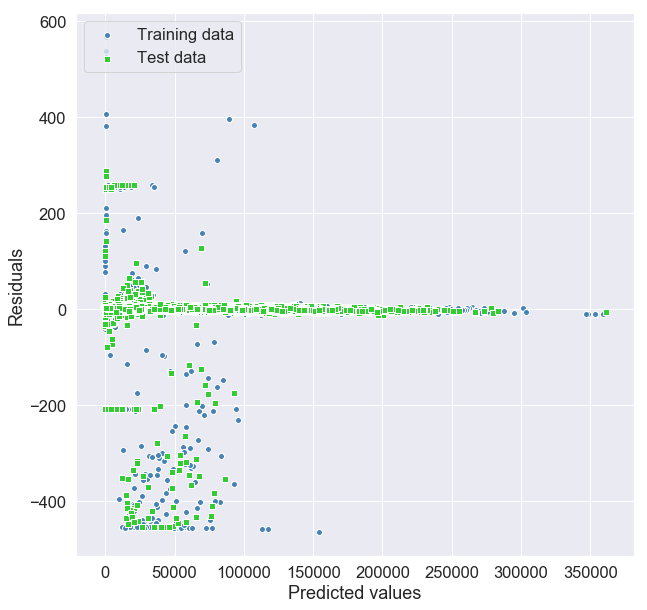

In [58]:
# Linear model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,y_train)

model_eval(slr)

In [ ]:
# Regularized Methods(Ridge, Least Absolute Shrinkage and Selection Operator (LASSO), Elastic Net)

In [ ]:
# Decision Tree Regression and Random forest Regression